In [3]:
import pandas as pd

In [6]:
df = pd.read_excel(r"D:\AI_Echo\data\raw\chatgpt_style_reviews_dataset.xlsx")
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,########,Review title 1,"Not satisfied, many bugs and issues.",1,user1,80,6,Amazon,zh,Kenya,2.1.4,No
1,########,Review title 2,Amazing quality and user-friendly interface.,5,user2,180,5,Flipkart,zh,France,1.2.3,No
2,########,Review title 3,"Terrible experience, needs major improvements.",2,user3,154,5,Flipkart,pt,USA,1.2.3,No
3,########,Review title 4,Poor performance and not user-friendly.,1,user4,96,5,Amazon,es,Qatar,2.1.4,Yes
4,########,Review title 5,"Not satisfied, many bugs and issues.",2,user5,139,6,Website,ar,Kenya,2.1.4,No


This dataset contains structured metadata such as rating, platform, and version,
and unstructured text data in the form of user reviews,
making it suitable for NLP-based sentiment analysis.

In [7]:
def label_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

df["sentiment"] = df["rating"].apply(label_sentiment)


<Axes: xlabel='rating'>

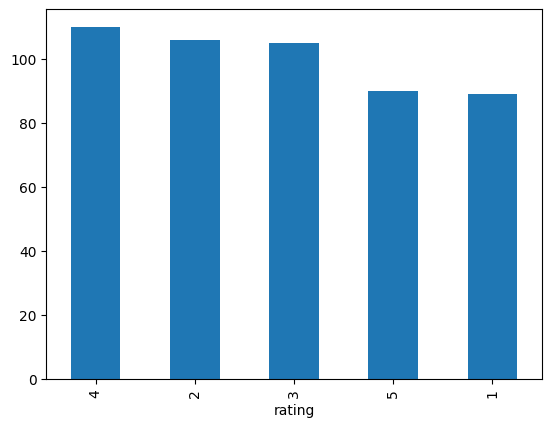

In [8]:
df["rating"].value_counts().plot(kind="bar")


Most users provided positive ratings, indicating good customer satisfaction.

<Axes: ylabel='count'>

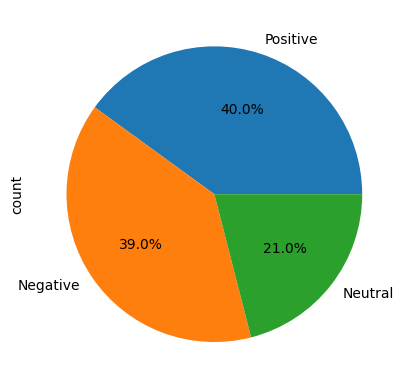

In [9]:
df["sentiment"].value_counts().plot(kind="pie", autopct="%1.1f%%")


Most users provided positive ratings, indicating good customer satisfaction.

<Axes: xlabel='platform'>

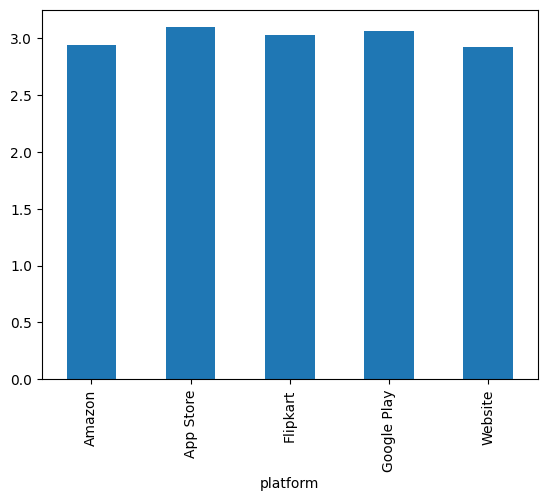

In [10]:
df.groupby("platform")["rating"].mean().plot(kind="bar")


Most users provided positive ratings, indicating good customer satisfaction.

In [12]:
df["date"].head(10)


0               ########
1               ########
2               ########
3               ########
4               ########
5    2024-05-05 00:00:00
6    2024-03-09 00:00:00
7    2024-03-08 00:00:00
8               ########
9               ########
Name: date, dtype: object

In [13]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")


C:\Users\revat\AppData\Local\Temp\ipykernel_21932\930674051.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"], errors="coerce")


In [14]:
df = df.dropna(subset=["date"])


<Axes: xlabel='date'>

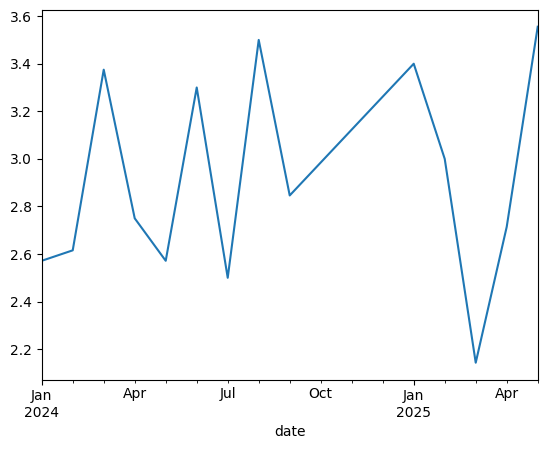

In [15]:
df.groupby(df["date"].dt.to_period("M"))["rating"].mean().plot()


Most users provided positive ratings, indicating good customer satisfaction.